In [5]:
# Import Libraries
import os
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Visuzliation Setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import colors
import seaborn as sns

In [6]:
color_palette = 'Set3'
title_size = 20
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

# 1. Acquire Data

In [5]:
root = os.path.join(os.getcwd(), 'DATA')

In [6]:
#df_raw = pd.read_excel(os.path.join(root, 'train.xlsx'))
df_raw = pd.read_excel("C:/python/빅콘데이터/train.xlsx")
df_train = df_raw.copy()

In [6]:
df_train.head(10)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340
5,2015-12-28,수산물,중국,중국,판매용,어류,복어,은밀복,냉동,2.167951
6,2015-12-28,수산물,중국,중국,판매용,어류,옥돔,옥돔,냉동,5.145111
7,2015-12-28,수산물,중국,중국,판매용,어류,복어,까치복,냉동,4.265697
8,2015-12-28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.202863
9,2015-12-28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살",6.972132


In [7]:
print(df_train.dtypes)

REG_DATE         datetime64[ns]
P_TYPE                   object
CTRY_1                   object
CTRY_2                   object
P_PURPOSE                object
CATEGORY_1               object
CATEGORY_2               object
P_NAME                   object
P_IMPORT_TYPE            object
P_PRICE                 float64
dtype: object


In [8]:
df_train.CATEGORY_1.describe()

count     42073
unique        7
top          어류
freq      21339
Name: CATEGORY_1, dtype: object

In [15]:
df_train.CATEGORY_2.describe()

count     42073
unique      113
top          새우
freq       4141
Name: CATEGORY_2, dtype: object

Text(0.5, 1.0, '품목')

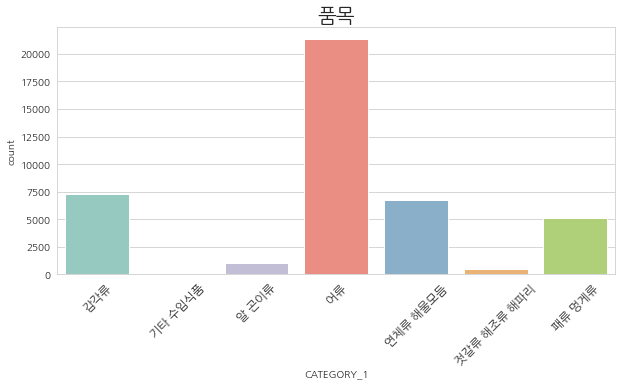

In [19]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.countplot(df_train['CATEGORY_1'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('품목', fontsize=title_size)


In [3]:
#df_raw = pd.read_excel(os.path.join(root, 'train.xlsx'))
df_raw = pd.read_csv("C:/python/빅콘데이터/갑각류.csv")
df_train = df_raw.copy()

In [4]:
df_train.head(10)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.202863
4,2015-12-28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살",6.972132
5,2015-12-28,수산물,페루,페루,판매용,갑각류,새우,흰다리새우,냉동,6.100000
6,2015-12-28,수산물,러시아,러시아,판매용,갑각류,게,대게,냉장,2.000000
7,2015-12-28,수산물,태국,태국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",13.377047
8,2015-12-28,수산물,태국,태국,판매용,갑각류,새우,흰다리새우,"냉동,살",15.050566
9,2015-12-28,수산물,미국,캐나다,판매용,갑각류,가재 랍스타,바다가재,활,19.162307


In [7]:
# 인덱스를 pandas의 datetime 형태로 바꿔주기
df_train.index = pd.to_datetime(df_train.index)

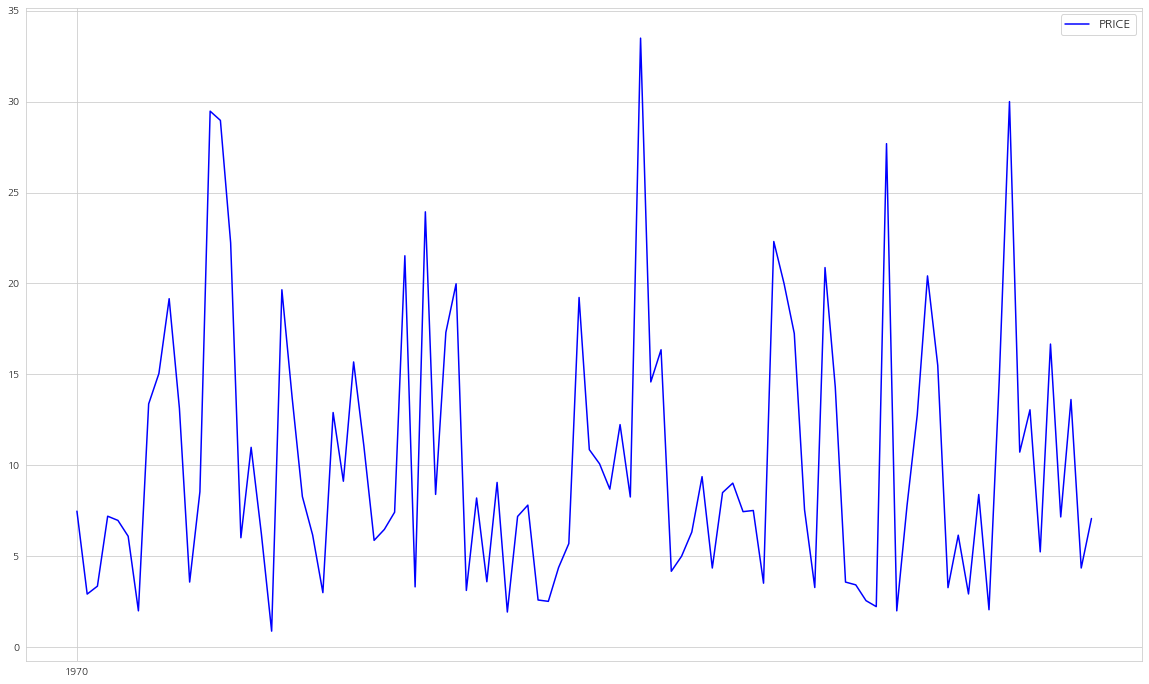

In [11]:
# 차트 그리기
fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성

ax.plot(df_train['P_PRICE'][:100], label='PRICE', color='b') # CLOU 종가 불러오기

ax.set_title('갑각류 가격', fontsize=20) # 타이틀 설정
ax.set_ylabel('price', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y축 설정

ax.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디

plt.show()

In [ ]:
#plt.scatter(data_kiosk.gu, data_kiosk.personal,  s=20*data_kiosk.k_zone)
plt.scatter(df_train.date, df_train.CATEGORY_1)
plt.xlabel('date')
plt.ylabel('shrimp')
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='date', y='CATEGORY_2', data=df_train, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('')
plt.title('기준년월에 따른 가격 변화', fontsize=title_size)
plt.show()

# 새우

In [16]:
#pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = px.data.gapminder()

In [16]:
#df_raw = pd.read_excel(os.path.join(root, 'train.xlsx'))
df_raw = pd.read_csv("C:/python/빅콘데이터/갑각류.csv")
df_train = df_raw.copy()

In [17]:
df_train.keys()

Index(['REG_YEAR', 'REG_MON', 'REG_DAY', 'P_TYPE', 'CTRY_1', 'CTRY_2',
       'P_PURPOSE', 'CATEGORY_1', 'CATEGORY_2', 'P_NAME', 'P_IMPORT_TYPE',
       'P_PRICE'],
      dtype='object')

In [18]:
is_shrimp = df_train['CATEGORY_2']=='새우'
shrimp=df_train[is_shrimp]
shrimp

,REG_YEAR,REG_MON,REG_DAY,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015,12,28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
3,2015,12,28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.202863
4,2015,12,28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살",6.972132
5,2015,12,28,수산물,페루,페루,판매용,갑각류,새우,흰다리새우,냉동,6.100000
7,2015,12,28,수산물,태국,태국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",13.377047
...,...,...,...,...,...,...,...,...,...,...,...,...
7283,2019,12,30,수산물,태국,태국,판매용,갑각류,새우,흰다리새우,냉장,11.500000
7284,2019,12,30,수산물,중국,중국,판매용,갑각류,새우,적새우,"냉동,살",6.111154
7287,2019,12,30,수산물,에콰도르,에콰도르,판매용,갑각류,새우,흰다리새우,냉동,6.739527
7289,2019,12,30,수산물,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.701577


Text(0.5, 1.0, '품목')

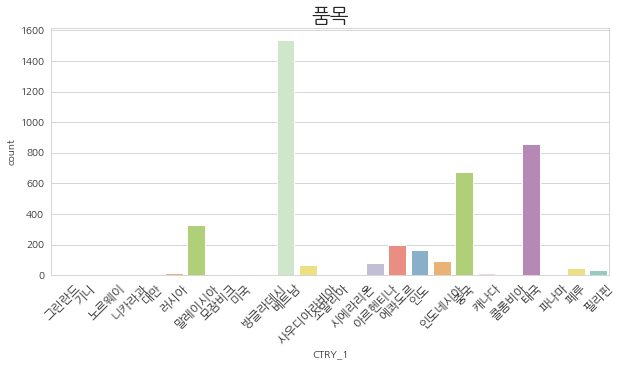

In [36]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.countplot(shrimp['CTRY_1'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('품목', fontsize=title_size)

새우품목 베트남, 태국, 중국 순

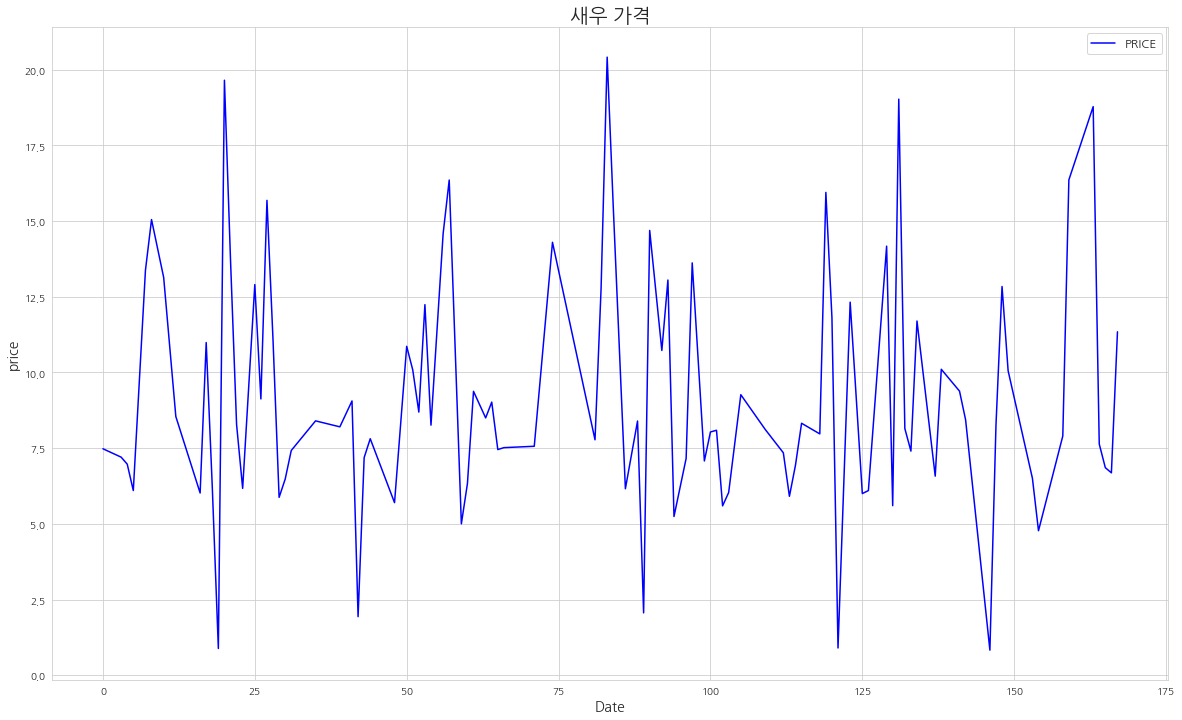

In [19]:
# 차트 그리기
fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성

ax.plot(shrimp['P_PRICE'][:100], label='PRICE', color='b') # CLOU 종가 불러오기

ax.set_title('새우 가격', fontsize=20) # 타이틀 설정
ax.set_ylabel('price', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y축 설정

ax.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디

plt.show()

100개순서대로 나열

# 월별새우가격

Text(0, 0.5, '새우가격')

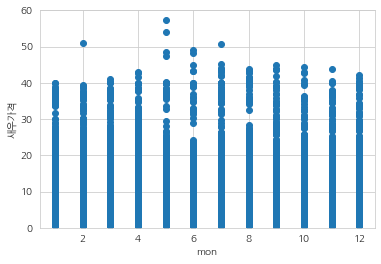

In [30]:
#plt.scatter(data_kiosk.gu, data_kiosk.personal,  s=20*data_kiosk.k_zone)
plt.scatter(df_train.REG_MON, df_train.P_PRICE)
plt.ylim(0,60)
plt.xlabel('mon')
plt.ylabel('새우가격')

월별가격 다양

In [40]:
is_vang = shrimp['CTRY_1']=='베트남'
vang=shrimp[is_vang]
vang

,REG_YEAR,REG_MON,REG_DAY,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
10,2015,12,28,수산물,베트남,베트남,판매용,갑각류,새우,홍다리얼룩새우,"냉동,살,포장횟감",13.137395
17,2015,12,28,수산물,베트남,베트남,판매용,갑각류,새우,홍다리얼룩새우,"냉동,살",10.989158
18,2015,12,28,수산물,베트남,베트남,자사제품제조용,갑각류,새우,새우,"냉동,살",6.222899
25,2015,12,28,수산물,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살,포장횟감",12.903215
27,2015,12,28,수산물,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙,포장횟감",15.684558
...,...,...,...,...,...,...,...,...,...,...,...,...
7267,2019,12,23,수산물,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살",8.884519
7275,2019,12,30,수산물,베트남,베트남,판매용,갑각류,새우,흰다리새우,냉동,7.291629
7276,2019,12,30,수산물,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙,포장횟감",13.953618
7289,2019,12,30,수산물,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.701577


In [ ]:
is_vang = shrimp['CTRY_1']=='베트남'
vang=shrimp[is_vang]
vang

Text(0, 0.5, '새우가격')

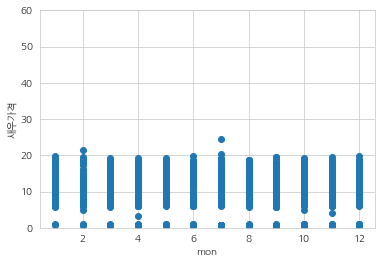

In [41]:
#plt.scatter(data_kiosk.gu, data_kiosk.personal,  s=20*data_kiosk.k_zone)
plt.scatter(vang.REG_MON, vang.P_PRICE)
plt.ylim(0,60)
plt.xlabel('mon')
plt.ylabel('새우가격')

Text(0.5, 1.0, '품목')

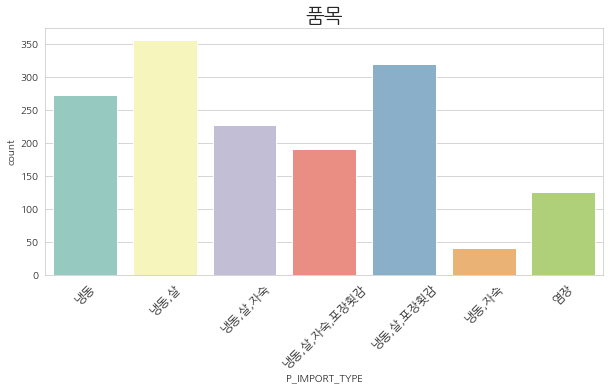

In [43]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.countplot(vang['P_IMPORT_TYPE'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('품목', fontsize=title_size)

In [44]:
is_nang = vang['P_IMPORT_TYPE']=='냉동,살'
nangvang=vang[is_nang]
nangvang

,REG_YEAR,REG_MON,REG_DAY,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
17,2015,12,28,수산물,베트남,베트남,판매용,갑각류,새우,홍다리얼룩새우,"냉동,살",10.989158
18,2015,12,28,수산물,베트남,베트남,자사제품제조용,갑각류,새우,새우,"냉동,살",6.222899
35,2015,12,28,수산물,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살",8.401501
52,2016,1,4,수산물,베트남,베트남,판매용,갑각류,새우,홍다리얼룩새우,"냉동,살",8.691986
54,2016,1,4,수산물,베트남,베트남,자사제품제조용,갑각류,새우,흰다리새우,"냉동,살",8.260303
...,...,...,...,...,...,...,...,...,...,...,...,...
7200,2019,12,16,수산물,베트남,베트남,판매용,갑각류,새우,홍다리얼룩새우,"냉동,살",14.887500
7206,2019,12,16,수산물,베트남,베트남,자사제품제조용,갑각류,새우,새우,"냉동,살",6.608286
7231,2019,12,16,수산물,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살",8.372439
7267,2019,12,23,수산물,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살",8.884519


Text(0, 0.5, '베트남,냉동살')

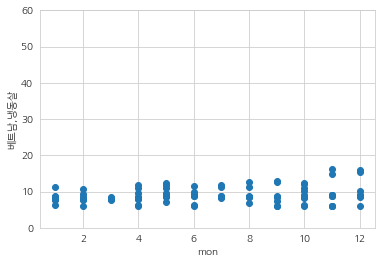

In [58]:
#plt.scatter(data_kiosk.gu, data_kiosk.personal,  s=20*data_kiosk.k_zone)

is_year = nangvang['REG_YEAR']==2016
yearman=nangvang[is_year]

plt.scatter(yearman.REG_MON, yearman.P_PRICE)
plt.ylim(0,60)
plt.xlabel('mon')
plt.ylabel('베트남,냉동살')

In [ ]:
yearman